In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
CP_LS = pd.read_csv('elec_simulation_CP_LS.csv')
print(CP_LS.head())
nexCP_LS = pd.read_csv('elec_simulation_nexCP_LS.csv')
print(nexCP_LS.head())
nexCP_WLS = pd.read_csv('elec_simulation_nexCP_WLS.csv')
print(nexCP_WLS.head())


  method  time    true_y  lower_bound  upper_bound  violation
0  CP+LS   100  0.393421     0.242460     0.504694      False
1  CP+LS   101  0.421053     0.230957     0.491008      False
2  CP+LS   102  0.473684     0.273828     0.537680      False
3  CP+LS   103  0.475000     0.312918     0.570264      False
4  CP+LS   104  0.431140     0.314720     0.571825      False
     method  time    true_y  lower_bound  upper_bound  violation
0  nexCP+LS   100  0.393421     0.231724     0.524783      False
1  nexCP+LS   101  0.421053     0.218756     0.509437      False
2  nexCP+LS   102  0.473684     0.270460     0.552164      False
3  nexCP+LS   103  0.475000     0.305084     0.570264      False
4  nexCP+LS   104  0.431140     0.304568     0.571825      False
      method  time    true_y  lower_bound  upper_bound  violation
0  nexCP+WLS   100  0.393421     0.220265     0.533898      False
1  nexCP+WLS   101  0.421053     0.220464     0.503378      False
2  nexCP+WLS   102  0.473684     0.26021

C:\Users\kobra\AppData\Local\Temp\ipykernel_30192\2771265013.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


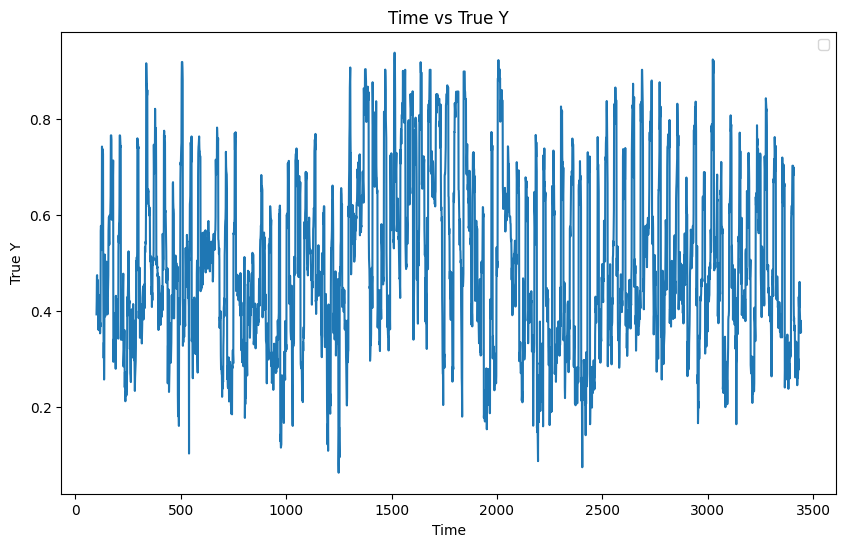

In [3]:
#for each 'setting' in CP_LS, plot the relation ship between 'time' to 'true_y', only do CP_LS, i want a line plot for each setting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
    
# create a line plot for 'time' vs 'true_y'
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='true_y', data=CP_LS)

# set the title and labels
plt.title(f'Time vs True Y')
plt.xlabel('Time')
plt.ylabel('True Y')

# show the legend
plt.legend()

# show the plot
plt.show()
    

In [4]:
from TestingFramework import binomial_test, geometric_conformal_test, dynamic_binary_regression_test, diebold_mariano_test

In [5]:

CP_LS_cov_rate = 1- CP_LS['violation'].mean()
nexCP_LS_cov_rate = 1- nexCP_LS['violation'].mean()
nexCP_WLS_cov_rate = 1- nexCP_WLS['violation'].mean()
#sum violation for each method and divide by the number of tests
violations_CP_LS = CP_LS['violation'].sum()
violations_nexCP_LS = nexCP_LS['violation'].sum()
violations_nexCP_WLS = nexCP_WLS['violation'].sum()
#get average interval length for each method
avg_interval_length_CP_LS     = (CP_LS['upper_bound']     - CP_LS['lower_bound']).abs().mean()
avg_interval_length_nexCP_LS  = (nexCP_LS['upper_bound']  - nexCP_LS['lower_bound']).abs().mean()
avg_interval_length_nexCP_WLS = (nexCP_WLS['upper_bound'] - nexCP_WLS['lower_bound']).abs().mean()
print(f'CP_LS coverage rate: {CP_LS_cov_rate}')
print(f'CP_LS average interval length: {avg_interval_length_CP_LS}')
#print(f'CP_LS violations: {violations_CP_LS}')
print(f'nexCP_LS coverage rate: {nexCP_LS_cov_rate}')
print(f'nexCP_LS average interval length: {avg_interval_length_nexCP_LS}')
#print(f'nexCP_LS violations: {violations_nexCP_LS}')
print(f'nexCP_WLS coverage rate: {nexCP_WLS_cov_rate}')
print(f'nexCP_WLS average interval length: {avg_interval_length_nexCP_WLS}')
#print(f'nexCP_WLS violations: {violations_nexCP_WLS}')
print('')

CP_LS coverage rate: 0.8522727272727273
CP_LS average interval length: 0.5646227434433084
nexCP_LS coverage rate: 0.8893540669856459
nexCP_LS average interval length: 0.6062528553506129
nexCP_WLS coverage rate: 0.8938397129186603
nexCP_WLS average interval length: 0.5269994557774699



In [6]:
CP_LS_setting = CP_LS.reset_index(drop=True)
nexCP_LS_setting = nexCP_LS.reset_index(drop=True)
nexCP_WLS_setting = nexCP_WLS.reset_index(drop=True)

# Helper function to convert p-values to text
def pass_fail(p):
    return 'Failed to reject' if p > 0.05 else 'Reject'

# 1. Binomial test
p_under_CP_LS, p_over_CP_LS, p_two_sided_CP_LS = binomial_test(CP_LS_setting['violation'], 0.1)
p_under_nexCP_LS, p_over_nexCP_LS, p_two_sided_nexCP_LS = binomial_test(nexCP_LS_setting['violation'], 0.1)
p_under_nexCP_WLS, p_over_nexCP_WLS, p_two_sided_nexCP_WLS = binomial_test(nexCP_WLS_setting['violation'], 0.1)

print('Binomial test:')
print('CP_LS: p under:', pass_fail(p_under_CP_LS), 
      'p over:', pass_fail(p_over_CP_LS), 
      'p two sided:', pass_fail(p_two_sided_CP_LS))
print('nexCP_LS: p under:', pass_fail(p_under_nexCP_LS), 
      'p over:', pass_fail(p_over_nexCP_LS), 
      'p two sided:', pass_fail(p_two_sided_nexCP_LS))
print('nexCP_WLS: p under:', pass_fail(p_under_nexCP_WLS), 
      'p over:', pass_fail(p_over_nexCP_WLS), 
      'p two sided:', pass_fail(p_two_sided_nexCP_WLS))
print('')

# 2. Geometric conformal test
pval_LRUC_CP_LS, pval_LRInd_CP_LS, pval_LRJoint_CP_LS = geometric_conformal_test(CP_LS_setting['violation'], 0.1)
pval_LRUC_nexCP_LS, pval_LRInd_nexCP_LS, pval_LRJoint_nexCP_LS = geometric_conformal_test(nexCP_LS_setting['violation'], 0.1)
pval_LRUC_nexCP_WLS, pval_LRInd_nexCP_WLS, pval_LRJoint_nexCP_WLS = geometric_conformal_test(nexCP_WLS_setting['violation'], 0.1)

print('Geometric conformal test:')
print('CP_LS: LRUC:', pass_fail(pval_LRUC_CP_LS), 
      'LRInd:', pass_fail(pval_LRInd_CP_LS), 
      'LRJoint:', pass_fail(pval_LRJoint_CP_LS))
print('nexCP_LS: LRUC:', pass_fail(pval_LRUC_nexCP_LS), 
      'LRInd:', pass_fail(pval_LRInd_nexCP_LS), 
      'LRJoint:', pass_fail(pval_LRJoint_nexCP_LS))
print('nexCP_WLS: LRUC:', pass_fail(pval_LRUC_nexCP_WLS), 
      'LRInd:', pass_fail(pval_LRInd_nexCP_WLS), 
      'LRJoint:', pass_fail(pval_LRJoint_nexCP_WLS))
print('')

# 3. Dynamic binary regression test
p_value_CP_LS = dynamic_binary_regression_test(CP_LS_setting['true_y'], CP_LS_setting['violation'], CP_LS_setting['lower_bound'], CP_LS_setting['upper_bound'], 0.1)
p_value_nexCP_LS = dynamic_binary_regression_test(nexCP_LS_setting['true_y'], nexCP_LS_setting['violation'], nexCP_LS_setting['lower_bound'], nexCP_LS_setting['upper_bound'], 0.1)
p_value_nexCP_WLS = dynamic_binary_regression_test(nexCP_WLS_setting['true_y'], nexCP_WLS_setting['violation'], nexCP_WLS_setting['lower_bound'], nexCP_WLS_setting['upper_bound'], 0.1)

print('Dynamic binary regression test:')
print('CP_LS:', pass_fail(p_value_CP_LS))
print('nexCP_LS:', pass_fail(p_value_nexCP_LS))
print('nexCP_WLS:', pass_fail(p_value_nexCP_WLS))
print('')




Binomial test:
CP_LS: p under: Reject p over: Failed to reject p two sided: Reject
nexCP_LS: p under: Reject p over: Failed to reject p two sided: Reject
nexCP_WLS: p under: Failed to reject p over: Failed to reject p two sided: Failed to reject

Geometric conformal test:
CP_LS: LRUC: Reject LRInd: Reject LRJoint: Reject
nexCP_LS: LRUC: Reject LRInd: Reject LRJoint: Reject
nexCP_WLS: LRUC: Failed to reject LRInd: Reject LRJoint: Reject

Dynamic binary regression test:
CP_LS: Reject
nexCP_LS: Reject
nexCP_WLS: Reject



In [7]:
# 4. Diebold-Mariano test
p_values_CP_LS_nexCP_LS = []
DM_stats_CP_LS_nexCP_LS = []
p_values_CP_LS_nexCP_WLS = []
DM_stats_CP_LS_nexCP_WLS = []
p_values_nexCP_LS_nexCP_WLS = []
DM_stats_nexCP_LS_nexCP_WLS = []


CP_LS_setting = CP_LS.reset_index(drop=True)
nexCP_LS_setting = nexCP_LS.reset_index(drop=True)
nexCP_WLS_setting = nexCP_WLS.reset_index(drop=True)

# 1. CP_LS vs nexCP_LS
dmstat_cp_lsnex, pval_cp_lsnex = diebold_mariano_test(
    CP_LS_setting['lower_bound'], CP_LS_setting['upper_bound'],
    nexCP_LS_setting['lower_bound'], nexCP_LS_setting['upper_bound'],
    nexCP_LS_setting['true_y'], 0.1
)
p_values_CP_LS_nexCP_LS.append(pval_cp_lsnex)
DM_stats_CP_LS_nexCP_LS.append(dmstat_cp_lsnex)

# 2. CP_LS vs nexCP_WLS
dmstat_cp_lswls, pval_cp_lswls = diebold_mariano_test(
    CP_LS_setting['lower_bound'], CP_LS_setting['upper_bound'],
    nexCP_WLS_setting['lower_bound'], nexCP_WLS_setting['upper_bound'],
    nexCP_WLS_setting['true_y'], 0.1
)
p_values_CP_LS_nexCP_WLS.append(pval_cp_lswls)
DM_stats_CP_LS_nexCP_WLS.append(dmstat_cp_lswls)

# 3. nexCP_LS vs nexCP_WLS
dmstat_nex_lswls, pval_nex_lswls = diebold_mariano_test(
    nexCP_LS_setting['lower_bound'], nexCP_LS_setting['upper_bound'],
    nexCP_WLS_setting['lower_bound'], nexCP_WLS_setting['upper_bound'],
    nexCP_LS_setting['true_y'], 0.1
)
p_values_nexCP_LS_nexCP_WLS.append(pval_nex_lswls)
DM_stats_nexCP_LS_nexCP_WLS.append(dmstat_nex_lswls)

# Now correct printing
print(f"1. CP_LS vs nexCP_LS: p-value: {p_values_CP_LS_nexCP_LS[0]}, DM statistic: {DM_stats_CP_LS_nexCP_LS[0]}")
print(f"2. CP_LS vs nexCP_WLS: p-value: {p_values_CP_LS_nexCP_WLS[0]}, DM statistic: {DM_stats_CP_LS_nexCP_WLS[0]}")
print(f"3. nexCP_LS vs nexCP_WLS: p-value: {p_values_nexCP_LS_nexCP_WLS[0]}, DM statistic: {DM_stats_nexCP_LS_nexCP_WLS[0]}")
print("")




Mean of d: 0.08414228532319844
DM variance: 0.0016235875751662197
DM stat: 2.088220927490863, p-value: 0.0367779103745598
Mean of d: 0.17566322238254656
DM variance: 0.004123260056444679
DM stat: 2.7356496785798634, p-value: 0.006225726545036281
Mean of d: 0.09152093705934812
DM variance: 0.005347811883188077
DM stat: 1.2515044469889114, p-value: 0.21075049223483688
1. CP_LS vs nexCP_LS: p-value: 0.0367779103745598, DM statistic: 2.088220927490863
2. CP_LS vs nexCP_WLS: p-value: 0.006225726545036281, DM statistic: 2.7356496785798634
3. nexCP_LS vs nexCP_WLS: p-value: 0.21075049223483688, DM statistic: 1.2515044469889114



In [8]:
# 1. CP_LS vs nexCP_LS
if p_values_CP_LS_nexCP_LS[0] < 0.05:
    if DM_stats_CP_LS_nexCP_LS[0] < 0:
        print("  Battle 1 (CP_LS vs nexCP_LS): CP_LS is better")
    else:
        print("  Battle 1 (CP_LS vs nexCP_LS): nexCP_LS is better")
else:
    print("  Battle 1 (CP_LS vs nexCP_LS): Tie (uncertain)")

# 2. CP_LS vs nexCP_WLS
if p_values_CP_LS_nexCP_WLS[0] < 0.05:
    if DM_stats_CP_LS_nexCP_WLS[0] < 0:
        print("  Battle 2 (CP_LS vs nexCP_WLS): CP_LS is better")
    else:
        print("  Battle 2 (CP_LS vs nexCP_WLS): nexCP_WLS is better")
else:
    print("  Battle 2 (CP_LS vs nexCP_WLS): Tie (uncertain)")

# 3. nexCP_LS vs nexCP_WLS
if p_values_nexCP_LS_nexCP_WLS[0] < 0.05:
    if DM_stats_nexCP_LS_nexCP_WLS[0] < 0:
        print("  Battle 3 (nexCP_LS vs nexCP_WLS): nexCP_LS is better")
    else:
        print("  Battle 3 (nexCP_LS vs nexCP_WLS): nexCP_WLS is better")
else:
    print("  Battle 3 (nexCP_LS vs nexCP_WLS): Tie (uncertain)")

print('')  # Space between settings

  Battle 1 (CP_LS vs nexCP_LS): nexCP_LS is better
  Battle 2 (CP_LS vs nexCP_WLS): nexCP_WLS is better
  Battle 3 (nexCP_LS vs nexCP_WLS): Tie (uncertain)

